In [2]:
from imageai.Prediction import ImagePrediction
import os
import pandas as pd
import numpy as np
from PIL import Image
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 


execution_path = os.getcwd()
prediction = ImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(execution_path, "/home/guest/Documents/Test1/ImageAI-master/imageai/Prediction/Weights/DenseNet.h5"))
prediction.loadModel()
TEST_PATH = '/home/guest/Documents/Aikomi'

In [4]:
def tag(TEST_PATH, prediction):
    pred_array = np.empty((0,6),dtype=object)
    for img in os.listdir(TEST_PATH):
        if img.endswith('.jpg'):
            image = Image.open(os.path.join(TEST_PATH, img))
            image = image.convert("RGB")
            image = np.array(image, dtype=np.uint8)
            predictions, probabilities = prediction.predictImage(os.path.join(TEST_PATH, img), result_count=5)
            temprow = np.zeros((1,pred_array.shape[1]),dtype=object)
            temprow[0,0] = img
            for i in range(len(predictions)):
                temprow[0,i+1] = predictions[i]
            pred_array = np.append(pred_array,temprow,axis=0)
    return pred_array

In [22]:
pred_array= tag(TEST_PATH, prediction)
print(np.shape(pred_array))
print(pred_array)

(354, 6)
[['1541565430897-Dog-maltese1.jpg' 'Maltese_dog' 'Lhasa' 'Shih-Tzu'
  'Japanese_spaniel' 'Tibetan_terrier']
 ['1534154099702-2017-01-06.jpg' 'alp' 'valley' 'seashore' 'lakeside'
  'volcano']
 ['1536925205335-0811wallpaper-5_1280.jpg' 'sandbar' 'geyser' 'seashore'
  'volcano' 'leatherback_turtle']
 ...
 ['1541064754434-download _1_.jpg' 'valley' 'cliff' 'lakeside' 'seashore'
  'alp']
 ['1540961836788-600600.jpg' 'hair_slide' 'bonnet' 'wig' 'wool'
  'hair_spray']
 ['1536924136635-0818wallpaper-7_1280.jpg' 'umbrella' 'parachute'
  'seashore' 'wreck' 'crutch']]


In [6]:
pred_array = tag(TEST_PATH, prediction)
def mapping(pred_array):
        all_tags = pred_array[:,1:2].reshape(1,-1).tolist()
        _in_sent = ' '.join(list(map(str,all_tags)))
        mappings = []
        for i in pred_array:
            for j in range(1):
                mappings.append([i[0],i[j+1]])
        return mappings, all_tags

In [23]:
mappings, all_tags=mapping(pred_array)
print(np.shape(mappings))
print(mappings)

(354, 2)
[['1541565430897-Dog-maltese1.jpg', 'Maltese_dog'], ['1534154099702-2017-01-06.jpg', 'alp'], ['1536925205335-0811wallpaper-5_1280.jpg', 'sandbar'], ['1534160719354-0811wallpaper-1_1280.jpg', 'cauliflower'], ['1541071465047-tree-736885__340.jpg', 'fountain'], ['0811wallpaper-8_1280.jpg', 'racket'], ['1541564513943-Bird-parakeet1.jpg', 'lorikeet'], ['1541564513810-Bird-finch1.jpg', 'kite'], ['1541076156450-0818wallpaper-10_1280.jpg', 'stone_wall'], ['1541075914699-0811wallpaper-8_1280.jpg', 'basketball'], ['1541487481511-volley ball.jpg', 'volleyball'], ['1541075383283-0817wallpaper-1_1600.jpg', 'pole'], ['1534238677268-0811wallpaper-8_1280.jpg', 'racket'], ['1541487407489-parade2.jpg', 'typewriter_keyboard'], ['1541485075251-Ashoka.jpg', 'torch'], ['1541564479593-Bird-finch3.jpg', 'hen'], ['1540800980622-BingWallpaper-2017-08-27.jpg', 'cliff'], ['1541484566715-marcus-aurelius.jpg', 'mask'], ['1540963949863-0811wallpaper-2_1280.jpg', 'coil'], ['1540788131615-DigitalGlobe_WorldVi

In [24]:
mappings, all_tags=mapping(pred_array)
print(np.shape(all_tags))
print(all_tags)

(1, 354)
[['Maltese_dog', 'alp', 'sandbar', 'cauliflower', 'fountain', 'racket', 'lorikeet', 'kite', 'stone_wall', 'basketball', 'volleyball', 'pole', 'racket', 'typewriter_keyboard', 'torch', 'hen', 'cliff', 'mask', 'coil', 'tarantula', 'cardoon', 'stone_wall', 'torch', 'seat_belt', 'albatross', 'great_white_shark', 'wire-haired_fox_terrier', 'cliff', 'lakeside', 'lakeside', 'alp', 'Granny_Smith', 'guillotine', 'daisy', 'cabbage_butterfly', 'cabbage_butterfly', 'park_bench', 'picket_fence', 'coil', 'vase', 'coil', 'cauliflower', 'seashore', 'stone_wall', 'stone_wall', 'fountain', 'crayfish', 'vase', 'hyena', 'tiger_shark', 'book_jacket', 'alp', 'broccoli', 'wig', 'patas', 'sarong', 'maze', 'prison', 'sandbar', 'Indian_elephant', 'Indian_elephant', 'sunglass', 'steam_locomotive', 'wire-haired_fox_terrier', 'bullet_train', 'reflex_camera', 'partridge', 'breakwater', 'Persian_cat', 'cauliflower', 'web_site', 'French_loaf', 'basketball', 'seashore', 'pajama', 'coil', 'alp', 'water_bottle'

In [11]:
mappings,_ = mapping(pred_array)
_,all_tags= mapping(pred_array)
def w2v(all_tags):
    model = Word2Vec(all_tags, min_count=1, size=2, alpha=0.025)
    words = list(model.wv.vocab)
    vector = list()
    for word in all_tags[0]:
        vector.append(model[word])
    return vector, words

In [25]:
vector, words=w2v(all_tags)
print(np.shape(vector))
print(vector)

(354, 2)
[array([-0.05058391, -0.24582602], dtype=float32), array([0.01091983, 0.07139827], dtype=float32), array([-0.2463245 , -0.07233888], dtype=float32), array([ 0.11292877, -0.18354422], dtype=float32), array([ 0.05126731, -0.00889057], dtype=float32), array([ 0.04084302, -0.14649184], dtype=float32), array([0.1143531 , 0.17925712], dtype=float32), array([-0.11145369,  0.0528217 ], dtype=float32), array([-0.10149819, -0.10200624], dtype=float32), array([0.13778204, 0.12701689], dtype=float32), array([-0.10096278, -0.1314794 ], dtype=float32), array([-0.15109932,  0.07690805], dtype=float32), array([ 0.04084302, -0.14649184], dtype=float32), array([0.11178729, 0.19747576], dtype=float32), array([0.22623755, 0.16330382], dtype=float32), array([0.17533395, 0.04717514], dtype=float32), array([-0.009298  , -0.06837263], dtype=float32), array([-0.19648059,  0.00936436], dtype=float32), array([-0.04149098,  0.1274738 ], dtype=float32), array([0.21328448, 0.15975253], dtype=float32), arra

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [26]:
vector, words=w2v(all_tags)
print(np.shape(words))
print(words)

(118,)
['Maltese_dog', 'alp', 'sandbar', 'cauliflower', 'fountain', 'racket', 'lorikeet', 'kite', 'stone_wall', 'basketball', 'volleyball', 'pole', 'typewriter_keyboard', 'torch', 'hen', 'cliff', 'mask', 'coil', 'tarantula', 'cardoon', 'seat_belt', 'albatross', 'great_white_shark', 'wire-haired_fox_terrier', 'lakeside', 'Granny_Smith', 'guillotine', 'daisy', 'cabbage_butterfly', 'park_bench', 'picket_fence', 'vase', 'seashore', 'crayfish', 'hyena', 'tiger_shark', 'book_jacket', 'broccoli', 'wig', 'patas', 'sarong', 'maze', 'prison', 'Indian_elephant', 'sunglass', 'steam_locomotive', 'bullet_train', 'reflex_camera', 'partridge', 'breakwater', 'Persian_cat', 'web_site', 'French_loaf', 'pajama', 'water_bottle', 'matchstick', 'fur_coat', 'robin', 'bannister', 'electric_locomotive', 'puffer', 'bullfrog', 'plastic_bag', 'hair_slide', 'volcano', 'chow', 'military_uniform', 'umbrella', 'pot', 'cuirass', 'space_bar', 'tree_frog', 'church', 'bonnet', 'space_shuttle', 'castle', 'Newfoundland', 'p

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [14]:
vector,words=w2v(all_tags)
def imglst(vector, mappings):
    image_name = []
    for i in range(len(all_tags[0])):
        image_name.append(mappings[i][0])
    return image_name

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [27]:
image_name=imglst(vector, mappings)
print(np.shape(image_name))
print(image_name)

(354,)
['1541565430897-Dog-maltese1.jpg', '1534154099702-2017-01-06.jpg', '1536925205335-0811wallpaper-5_1280.jpg', '1534160719354-0811wallpaper-1_1280.jpg', '1541071465047-tree-736885__340.jpg', '0811wallpaper-8_1280.jpg', '1541564513943-Bird-parakeet1.jpg', '1541564513810-Bird-finch1.jpg', '1541076156450-0818wallpaper-10_1280.jpg', '1541075914699-0811wallpaper-8_1280.jpg', '1541487481511-volley ball.jpg', '1541075383283-0817wallpaper-1_1600.jpg', '1534238677268-0811wallpaper-8_1280.jpg', '1541487407489-parade2.jpg', '1541485075251-Ashoka.jpg', '1541564479593-Bird-finch3.jpg', '1540800980622-BingWallpaper-2017-08-27.jpg', '1541484566715-marcus-aurelius.jpg', '1540963949863-0811wallpaper-2_1280.jpg', '1540788131615-DigitalGlobe_WorldView2_50cm_8bit_Pansharpened_RGB_DRA_Rome_Italy_2009DEC10_8bits_sub_r_1_BIGFILE.jpg', '1536924133586-0818wallpaper-3_1280.jpg', '1536228559386-0818wallpaper-10_1280.jpg', '1541484939119-Ashoka.jpg', '1541064418206-300400.jpg', '1541052655277-0817wallpaper-9

In [16]:
def co_ord(vector):
    Xaxis = list()
    yaxis = list()
    myarray = np.reshape(vector[:(np.shape(vector)[0])], 2*(np.shape(vector)[0]))
    for loop1 in range(2*(np.shape(vector)[0])):
        if(loop1%2 ==0):
            Xaxis.append(myarray[loop1])
        else:
            yaxis.append(myarray[loop1])
    X = np.vstack((Xaxis, yaxis)).T
    return X

In [28]:
X=co_ord(vector)
print(np.shape(X))
print(X)

(354, 2)
[[-0.05058391 -0.24582602]
 [ 0.01091983  0.07139827]
 [-0.2463245  -0.07233888]
 [ 0.11292877 -0.18354422]
 [ 0.05126731 -0.00889057]
 [ 0.04084302 -0.14649184]
 [ 0.1143531   0.17925712]
 [-0.11145369  0.0528217 ]
 [-0.10149819 -0.10200624]
 [ 0.13778204  0.12701689]
 [-0.10096278 -0.1314794 ]
 [-0.15109932  0.07690805]
 [ 0.04084302 -0.14649184]
 [ 0.11178729  0.19747576]
 [ 0.22623755  0.16330382]
 [ 0.17533395  0.04717514]
 [-0.009298   -0.06837263]
 [-0.19648059  0.00936436]
 [-0.04149098  0.1274738 ]
 [ 0.21328448  0.15975253]
 [-0.09326983  0.06829177]
 [-0.10149819 -0.10200624]
 [ 0.22623755  0.16330382]
 [-0.07814296  0.04897884]
 [ 0.07961036  0.05793228]
 [-0.01228238 -0.0401345 ]
 [-0.19230583 -0.18782176]
 [-0.009298   -0.06837263]
 [-0.02815747  0.1312689 ]
 [-0.02815747  0.1312689 ]
 [ 0.01091983  0.07139827]
 [ 0.15152523 -0.20263001]
 [-0.09428372 -0.06721915]
 [ 0.20065221  0.22176665]
 [ 0.11363838  0.11346372]
 [ 0.11363838  0.11346372]
 [ 0.00632391 -0.10

In [18]:
image_name=w2v(all_tags)
X=co_ord(vector)
def K_mean(X, image_name):
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    c = np.random.randint(1,5,size=522)
    
    norm = plt.Normalize(1,4)
    cmap = plt.cm.RdYlGn
    
    fig,ax = plt.subplots()
    sc = plt.scatter(X[:,0], X[:,1],c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    
    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    
    def update_annot(ind):
        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                               " ".join([image_name[n] for n in ind["ind"]]))
        annot.set_text(text)
        annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(0.4)
    
    
    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()
    fig.canvas.mpl_connect("motion_notify_event", hover)
    return y_kmeans

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(354,)
[3 0 3 1 1 1 2 0 3 2 3 0 1 2 2 2 1 0 0 2 0 3 2 0 2 1 3 1 0 0 0 1 3 2 2 2 1
 0 0 1 0 1 1 3 3 1 0 1 1 1 0 0 1 2 1 0 0 0 3 0 0 3 2 3 2 3 0 2 0 1 0 3 2 1
 2 0 0 1 0 2 0 0 0 0 2 0 0 2 3 3 1 0 1 3 0 1 0 3 3 2 2 1 0 2 0 2 2 1 3 3 0
 1 2 0 2 2 3 2 3 2 1 2 0 2 2 2 2 1 2 1 2 0 2 1 0 0 1 2 0 0 0 1 0 2 1 0 3 0
 2 2 3 0 1 0 0 3 2 2 2 2 3 2 3 1 0 3 3 0 1 2 3 2 1 2 1 0 0 0 1 2 3 1 3 2 2
 3 2 0 1 2 1 0 1 2 2 1 0 2 1 3 0 2 0 3 2 0 2 2 2 2 2 2 2 2 0 3 3 0 2 2 1 3
 0 0 1 3 2 1 0 1 2 0 3 1 0 1 1 2 1 0 0 2 1 2 2 1 2 1 0 3 1 0 0 3 0 1 1 0 0
 0 1 3 1 0 3 2 0 2 0 2 3 2 1 0 0 2 0 0 0 2 0 2 2 3 1 0 1 2 1 3 2 1 2 0 1 2
 1 1 1 2 2 2 0 2 2 0 2 1 3 2 3 1 2 1 1 0 2 1 1 3 0 1 3 0 2 3 1 2 0 2 2 0 2
 0 2 2 3 0 1 0 3 0 0 2 3 2 2 3 1 2 3 0 1 3]


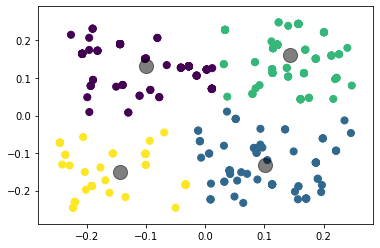

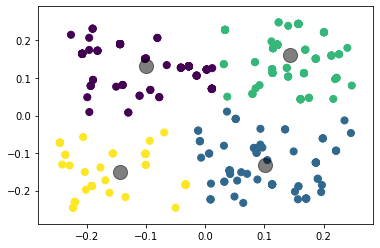

In [29]:
y_kmeans=K_mean(X, image_name)
print(np.shape(y_kmeans))
print(y_kmeans)

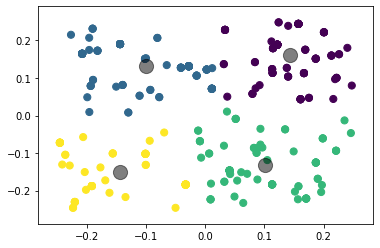

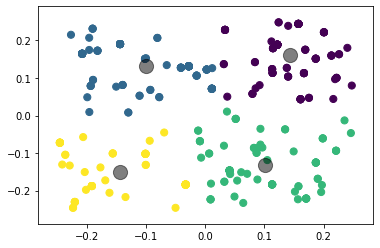

In [20]:
y_kmeans=K_mean(X, image_name)
def clustdf(y_kmeans, X, words, image_name):
    cluster_center = list()
    for center in range(len(X)):
        cluster_center.append(y_kmeans[center])
    tag_cluster = pd.DataFrame({'cluster_center': cluster_center,'image_tags': words })
    mappings = {k:v for k,v in zip(words, image_name)}
    tag_cluster['image_name'] = pd.Series([mappings[i] for i in tag_cluster.image_tags])
#   mappings = {k:v for k,v in zip(vector, image_name)}
#   tag_cluster['image_name'] = pd.toSeries([mappings[i] for i in tag_cluster.image_tags])
    #df_cluster1 = tag_cluster[tag_cluster['cluster_center']==0]
    #df_cluster2 = tag_cluster[tag_cluster['cluster_center']==1]
    #df_cluster3 = tag_cluster[tag_cluster['cluster_center']==2]
    #df_cluster4 = tag_cluster[tag_cluster['cluster_center']==3]
    return tag_cluster

In [21]:
tag_cluster=clustdf(y_kmeans, X, words, image_name)
print(tag_cluster)

ValueError: arrays must all be same length